In [61]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing

In [62]:
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [63]:
data = pd.read_csv("Data/area1.csv")

data.head()

,Date,Drought Level Index,Precipitation_in,Temperature_C,Vegetation,Evapotranspiration,County
0,2000-02,1.754260,0.32,25.557100,0.20440,1.640400,Crosby
1,2000-03,2.016075,3.07,26.973700,0.21600,2.716475,Crosby
2,2000-04,0.296925,2.36,33.351775,0.27375,1.790225,Crosby
3,2000-05,0.406600,1.02,40.815733,0.29960,1.057933,Crosby
4,2000-06,0.250000,4.55,36.667025,0.40450,3.800975,Crosby


In [64]:
X = data[['Precipitation_in','Temperature_C','Vegetation','Evapotranspiration']].copy()
# split feature and label
y = data['Drought Level Index'].copy()
len(X)

2367

In [65]:
X_train = X[0:1894][:]
X_test = X[1894:][:]
y_train = y[0:1894]
y_test = y[1894:]

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [66]:
type(X_train)

numpy.ndarray

In [67]:
type(y_train)

pandas.core.series.Series

In [68]:
# build Deep NN model with three layers
tensorflow_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Activation('relu'),
    layers.Dense(1)
])

tensorflow_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

#tensorflow_model.summary()

In [69]:
# Using a custom callback to plot the total time taken to fit certain epochs.
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        self.epochs = []
        # use this value as reference to calculate cummulative time taken
        self.timetaken = tf.timestamp()
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append(tf.timestamp() - self.timetaken)
        self.timetaken = tf.timestamp()
        self.epochs.append(epoch)
    def on_train_end(self,logs = {}):
        print('Total training time:', sum(self.times))
        plt.figure(figsize=(6,4))
        plt.xlabel('Epoch')
        plt.ylabel('Training time per epoch (s)')
        plt.plot(self.epochs, self.times)
        plt.grid()
        

Total training time: tf.Tensor(4.932398319244385, shape=(), dtype=float64)


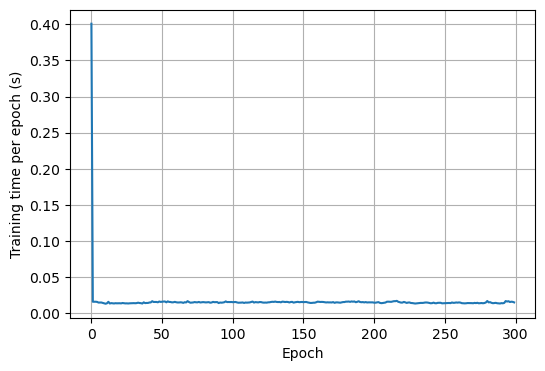

In [70]:
timetaken = timecallback()

history = tensorflow_model.fit(X_train, y_train, epochs=300, batch_size=64,
                     # Suppress logging.
                     verbose=0,
                     # use callback to plot training time
                     callbacks = [timetaken])

In [71]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.head(5))
print(hist.tail(5))

       loss  epoch
0  4.011522      0
1  3.150352      1
2  2.767370      2
3  2.613151      3
4  2.507082      4
         loss  epoch
295  1.734824    295
296  1.737976    296
297  1.735241    297
298  1.736449    298
299  1.737123    299


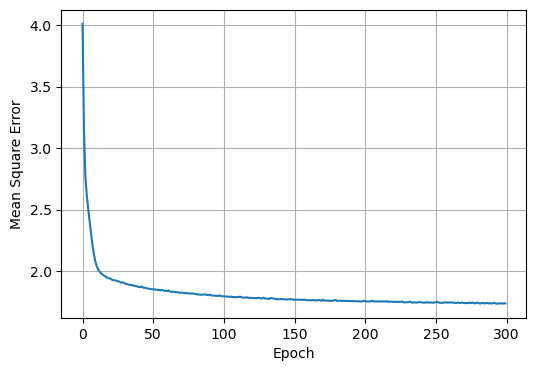

In [72]:
plt.figure(figsize=(6,4))

plt.plot(hist['epoch'], hist['loss'])
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.grid()
plt.show()

In [73]:
tensorflow_model.evaluate(X_test, y_test, verbose=0)

1.6684437990188599

In [74]:
preds = tensorflow_model.predict(X_test)

15/15 [==============================] - 0s 583us/step


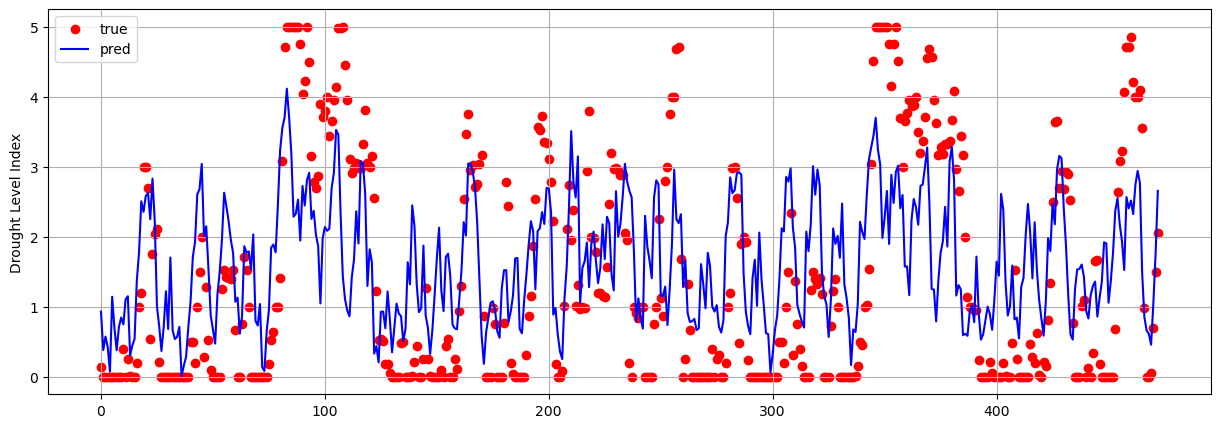

In [75]:
x = tf.linspace(0.0, len(y_test)-1, len(y_test))
plt.figure(figsize=(15,5))
plt.scatter(x, y_test, label='true', color='red')
plt.plot(x, preds, label='pred', color='blue')
plt.ylabel('Drought Level Index')
plt.grid()
plt.legend()
plt.show()